<a href="https://colab.research.google.com/drive/1Xm6l4Drtfj3Dxy7T0XsV655javYVAy4S" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import libraries
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow

Note: When apply this method to high image resolution (7m altitude of flight), the X value from `X*dist_transform.max()` have to be increased, as well as use blur images.


In this stydy were used:

*   10m:

  - No blur images
  - `0.1*dist_transform.max()`

*   7m:

  - Blur images
  - `0.3*dist_transform.max()`

In [ ]:
%cd '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN'

img_dir = '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot/msk_CNN'
img_dir

if os.path.exists(img_dir):
      img = cv2.imread(img_dir)
else:
      print("Path does not exist:", img_dir)

prefixes = ["2201", "2202"]

img_list = sorted(os.listdir(img_dir))
img_list = [v for v in img_list if v.startswith(tuple(prefixes)) and v.endswith('.png')]
print(img_list)
print(len(img_list))

/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN
['2201_1001_7m_msk.png', '2201_1002_7m_msk.png', '2201_1003_7m_msk.png', '2201_1004_7m_msk.png', '2201_1005_7m_msk.png', '2201_1006_7m_msk.png', '2201_1007_7m_msk.png', '2201_1008_7m_msk.png', '2201_1009_7m_msk.png', '2201_1010_7m_msk.png', '2201_1011_7m_msk.png', '2201_1012_7m_msk.png', '2201_1013_7m_msk.png', '2201_1014_7m_msk.png', '2201_1015_7m_msk.png', '2201_1016_7m_msk.png', '2201_1017_7m_msk.png', '2201_1018_7m_msk.png', '2201_1019_7m_msk.png', '2201_1020_7m_msk.png', '2201_1021_7m_msk.png', '2201_1022_7m_msk.png', '2201_1023_7m_msk.png', '2201_1024_7m_msk.png', '2201_1025_7m_msk.png', '2201_1026_7m_msk.png', '2201_1027_7m_msk.png', '2201_1028_7m_msk.png', '2201_1029_7m_msk.png', '2201_1030_7m_msk.png', '2201_1031_7m_msk.png', '2201_1032_7m_msk.png', '2201_1033_7m_msk.png', '2201_1034_7m_msk.png', '2201_1035_7m_msk.png', '2201_1036_7m_msk.png', '2201_2001_7m_msk.png', '2201_2002_7m_msk.png

In [ ]:
stand_list = []
for img in img_list:

  image = cv2.imread(os.path.join(img_dir, img)) 
  
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  kernel = np.ones((3,3),np.uint8)
  blur = gray.copy()
  gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

  blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # plt.imshow(blur)

  dist_transform = cv2.distanceTransform(blur,cv2.DIST_L2,5)
  #canny = cv2.morphologyEx(canny, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
  #plt.figure(figsize = (15,10))
  #plt.imshow(dist_transform, interpolation='nearest')

  # Draw sure figure from distance transform
  ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0) # 0.2 is important, the bigger it is, the object is smaller (to the object center)
  sure_fg = np.uint8(sure_fg)

  #plt.figure(figsize = (20,10))
  #plt.imshow(sure_fg, interpolation='nearest')

  #backup = sure_fg.copy()   #taking backup of the input image
  #sure_fg1 = 255-backup#colour inversion  

  #plt.figure(figsize = (25,10))
  #plt.imshow(sure_fg, interpolation='nearest')

  (cnt, hierarchy) = cv2.findContours(
  sure_fg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

  stand_list.append([img.split('.')[0], len(cnt)]) ## saving stand count number
  print("Counting: bean plant per plot : ", len(cnt))

stand = np.array(stand_list)
np.savetxt('./SC_7m_M2_pred.csv', stand, delimiter= ',', fmt="%s")

Counting: bean plant per plot :  167
Counting: bean plant per plot :  176
Counting: bean plant per plot :  176
Counting: bean plant per plot :  212
Counting: bean plant per plot :  160
Counting: bean plant per plot :  114
Counting: bean plant per plot :  114
Counting: bean plant per plot :  140
Counting: bean plant per plot :  153
Counting: bean plant per plot :  178
Counting: bean plant per plot :  162
Counting: bean plant per plot :  135
Counting: bean plant per plot :  178
Counting: bean plant per plot :  164
Counting: bean plant per plot :  150
Counting: bean plant per plot :  146
Counting: bean plant per plot :  222
Counting: bean plant per plot :  203
Counting: bean plant per plot :  111
Counting: bean plant per plot :  132
Counting: bean plant per plot :  140
Counting: bean plant per plot :  179
Counting: bean plant per plot :  133
Counting: bean plant per plot :  144
Counting: bean plant per plot :  206
Counting: bean plant per plot :  184
Counting: bean plant per plot :  166
C

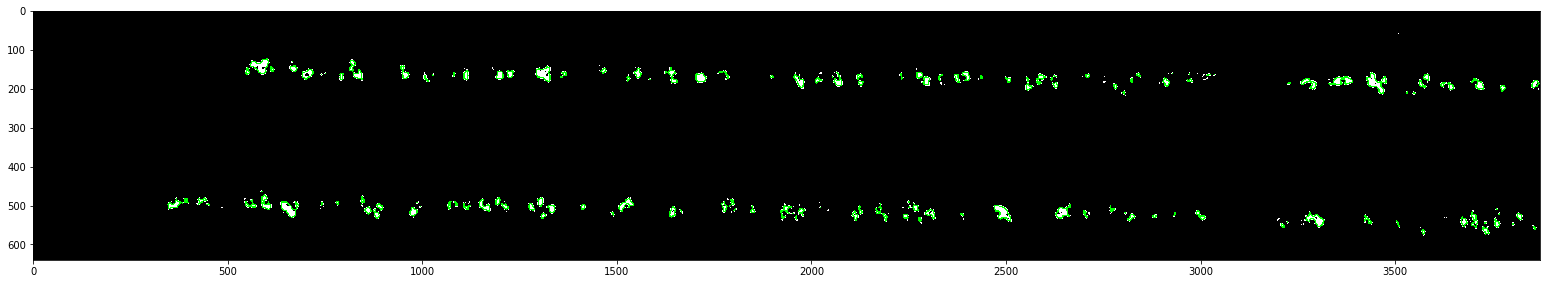

In [ ]:
plt.figure(figsize = (27,10))
plt.imshow(rgb, interpolation='nearest')

In [8]:
# Counting the number of plants
img_rgb = cv2.imread('/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/e._Resize_img_annot/Plots_img/2201_1001_7m.png')
cv2_imshow(img_rgb)

img_msk = cv2.imread('/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot/msk_CNN/2201_1001_7m_msk.png')
cv2_imshow(img_msk)

gray = cv2.cvtColor(img_msk, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

count = 0

for i in range(len(contours)):
           
    x, y, w, h = cv2.boundingRect(contours[i])    

    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 255), 3)
    cv2.drawContours(img_rgb, contours, i, (0, 0, 255), 3)
    
    count += 1

print('Number of bean plants : ', count)

#See how the countours are selected by plotting countours on the actual image.
plt.axis('off')
cv2_imshow(img_rgb)

Output hidden; open in https://colab.research.google.com to view.